# Section 5A: Dataset Verification and Suitability for TSA

This notebook performs dataset verification and summary analysis for the synthetic SQL Server workload, in alignment with Section 5A of the paper.

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data
df = pd.read_csv('SimulatedQueryMetrics.csv')  # Adjust path if needed
df['MetricDate'] = pd.to_datetime(df['MetricDate'])

## 1. Summary Table of Key Statistics

In [8]:
import pandas as pd
pd.set_option('display.width', 1000) # Adjust the number as needed
pd.set_option('display.max_columns', None) # Display all columns without truncation

In [10]:
def metric_summary(df, cols):
    stats = []
    for col in cols:
        vals = df[col]
        stats.append([
            col,
            100*vals.isnull().mean(),
            vals.min(skipna=True),
            vals.max(skipna=True),
            vals.mean(skipna=True),
            vals.std(skipna=True),
            vals.skew(skipna=True),
            vals.kurtosis(skipna=True),
        ])
    return pd.DataFrame(stats, columns=["Metric","Null Ratio (%)","Min","Max","Mean","StdDev","Skewness","Kurtosis"])

summary = metric_summary(df, ['CPU', 'LatencyMs', 'LogicalReads'])
pd.set_option('display.float_format', lambda x: f'{x:,.4f}')
print(summary)

         Metric  Null Ratio (%)      Min      Max     Mean  StdDev  Skewness  Kurtosis
0           CPU          7.5417  22.7798 116.1179  60.8769 16.6884    0.5153   -0.0768
1     LatencyMs          7.5417 137.4589 352.4403 205.3521 38.0491    1.0746    0.6293
2  LogicalReads          7.3125 108.3470 241.3794 168.0291 25.1298    0.2596   -0.4768


## 2. Null Counts per Metric

In [12]:
nulls = df[['CPU','LatencyMs','LogicalReads']].isnull().sum()
nulls

CPU             362
LatencyMs       362
LogicalReads    351
dtype: int64

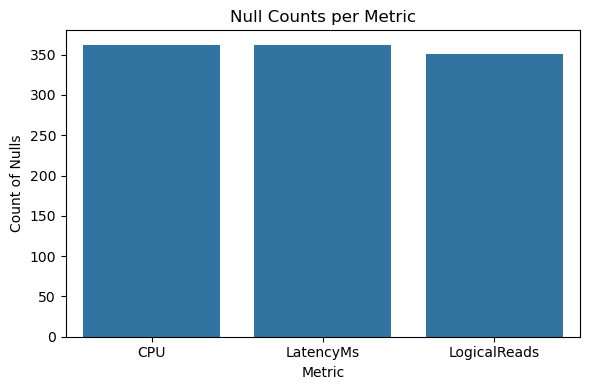

Figure 1: Bar plot of null counts per metric


In [14]:
plt.figure(figsize=(6,4))
sns.barplot(x=nulls.index, y=nulls.values)
plt.title('Null Counts per Metric')
plt.ylabel('Count of Nulls')
plt.xlabel('Metric')
plt.tight_layout()
plt.show()
print("Figure 1: Bar plot of null counts per metric")

## 3. Visualizing Missingness Across Time (Heatmap)

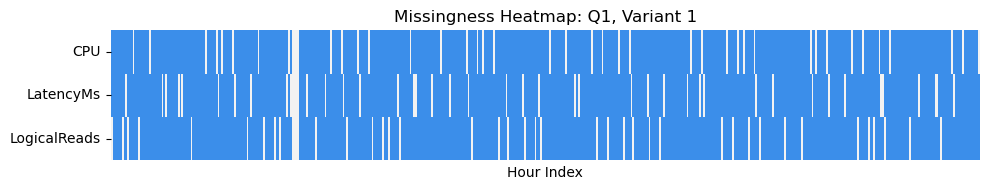

Figure 2: Heatmap of missing values (white = missing, color = present)


In [16]:
# Select a single QueryName and QueryVariant for heatmap visualization
sub = df[(df['QueryName']=='Q1') & (df['QueryVariant']==1)].copy()
sub = sub.sort_values('MetricDate')
mask = sub[['CPU','LatencyMs','LogicalReads']].isnull().astype(int)

plt.figure(figsize=(10,2))
sns.heatmap(mask.T, cmap=["#3b8eea","#f2f2f2"], cbar=False, xticklabels=False)
plt.yticks([0.5,1.5,2.5], ['CPU','LatencyMs','LogicalReads'], rotation=0)
plt.title('Missingness Heatmap: Q1, Variant 1')
plt.xlabel('Hour Index')
plt.tight_layout()
plt.show()
print("Figure 2: Heatmap of missing values (white = missing, color = present)")

## 4. Discussion

- Null ratios are moderate (~7.5%) and consistent across metrics, reflecting realistic operational data gaps.
- Missingness includes both isolated and block gaps (see heatmap), as per simulation design.
- These properties confirm suitability for time series analysis and for benchmarking model robustness to missing data and regime shifts.
- For more details and analysis, see Section 5 of the main paper.